## Lorenzo Nastri

### lorenzonastri@gmail.com
### https://www.linkedin.com/in/lorenzo-nastri



Instructions

1. Download both datasets and review the information they contain, they are in CSV format.
2. Make a brainstorming about some questions that could be answered using the given datasets, then start answering those questions. Try and suggest questions that promote observation, relationships between multiple variables. You should try to analyze at least one dependent variable and three independent variables in your research. A script in Python is attached, it can be executed using Jupyter Notebook and it will give you an idea to start with the analysis, however, you can use any technology or language that allows you to analyze the dataset and discard the script.
3. Share your findings once you have finished analyzing the data, create a report that shares the results that you found most interesting. If you use Jupyter, share your findings along with the code you would use to perform the analysis. Make sure that the text of your report is contained in the Markdown cells to clearly distinguish your comments and conclusions from your coding work.

# Objective.

My objective is to perform a simple analysis that can demonstrate my skills in the use of Python and machine learning. For this I try to perform data wrangling and data visualization operations to analyze the variables and then make a base model with sckit-learn.

As a methodology, I understand Exploratory Data Analysis, as the advance on certain insights of the variables, always questioning about the transformations that may exist in the variables and the possibility of making a feature engineering according to a subject that I do not know. Finally, the Machine Learning approach leads me to select the interesting columns as variables with predictive capacity, and separate my data set into training and testing, in order to make a good evaluation of the model, understanding if my model underfitea, overfitea or has a good balance.

I import base libraries. Remember that in the separation of training and testing there is a random factor so the random_seed must be the same as I am using to get the same results.



___

In [259]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [260]:
df_car_sales = pd.read_csv("ventas_de_autos.csv", delimiter='|')
df_car_sales.head()

,Unnamed: 0,Kilometraje,Pais de Origen,Ranking en revistas de auto,precio en mercado libre,fecha_de_elaboracion,ventas
0,0,112018.633266,Japón,148,61584.272399,2014-04-22,1.202479e+06
1,1,144461.926443,Italia,399,25158.524810,2022-09-10,4.647200e+05
2,2,122538.858334,Francia,424,19465.272138,2017-09-07,3.554535e+05
3,3,111252.220684,Estados Unidos,289,32689.870546,2016-03-30,6.441774e+05
4,4,87612.685871,Francia,450,20477.240703,2015-08-30,3.800819e+05


In [261]:
df_car_sales.drop(['Unnamed: 0'], axis=1, inplace=True)

### Read dataset and dimension

In [262]:
print(f"Dataset size: {df_car_sales.shape}")

Dataset size: (15, 6)


In [263]:
df_car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Kilometraje                  15 non-null     float64
 1   Pais de Origen               15 non-null     object 
 2   Ranking en revistas de auto  15 non-null     int64  
 3   precio en mercado libre      15 non-null     float64
 4   fecha_de_elaboracion         15 non-null     object 
 5   ventas                       15 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 852.0+ bytes


In order to observe all the columns I transpose the dataframe and inspect what it consists of.


In [264]:
df_car_sales.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Kilometraje,112018.633266,144461.926443,122538.858334,111252.220684,87612.685871,130949.352048,90329.506196,178895.735153,192914.238298,79771.096171,159386.382426,108134.509352,115768.689413,185491.344467,18852.031349
Pais de Origen,Japón,Italia,Francia,Estados Unidos,Francia,Corea del Sur,China,Estados Unidos,Alemania,Francia,Estados Unidos,Japón,Francia,Corea del Sur,Francia
Ranking en revistas de auto,148,399,424,289,450,266,186,128,33,32,203,245,152,164,460
precio en mercado libre,61584.272399,25158.52481,19465.272138,32689.870546,20477.240703,25562.497178,37054.228679,73181.893287,41496.499294,52914.442052,73164.400822,16949.624525,77886.634742,55719.802506,21963.67096
fecha_de_elaboracion,2014-04-22,2022-09-10,2017-09-07,2016-03-30,2015-08-30,2018-08-04,2014-11-06,2015-08-08,2022-09-17,2016-10-11,2022-01-20,2020-10-27,2014-09-11,2020-01-04,2021-03-11
ventas,1202478.8648,464720.043508,355453.497421,644177.403475,380081.893064,481685.923679,703947.093215,1423705.04453,799954.042401,1038586.523046,1421545.042237,322352.540471,1534601.611561,1065623.739058,411107.088743


I observe that it is a car sales dataset with its price, mileage, age, country of origin, etc. I rename my dataset pertinent to the topic.

In [265]:
car_sales= df_car_sales
del(df_car_sales)

### Missing values

In [266]:
print(car_sales.isnull().sum())

Kilometraje                    0
Pais de Origen                 0
Ranking en revistas de auto    0
precio en mercado libre        0
fecha_de_elaboracion           0
ventas                         0
dtype: int64


- There are no missing values on the dataset, so I can continue with the analysis.

### DateTime transformation

In [267]:
car_sales["fecha_de_elaboracion"] = pd.to_datetime(car_sales["fecha_de_elaboracion"])

### Outliers treatment

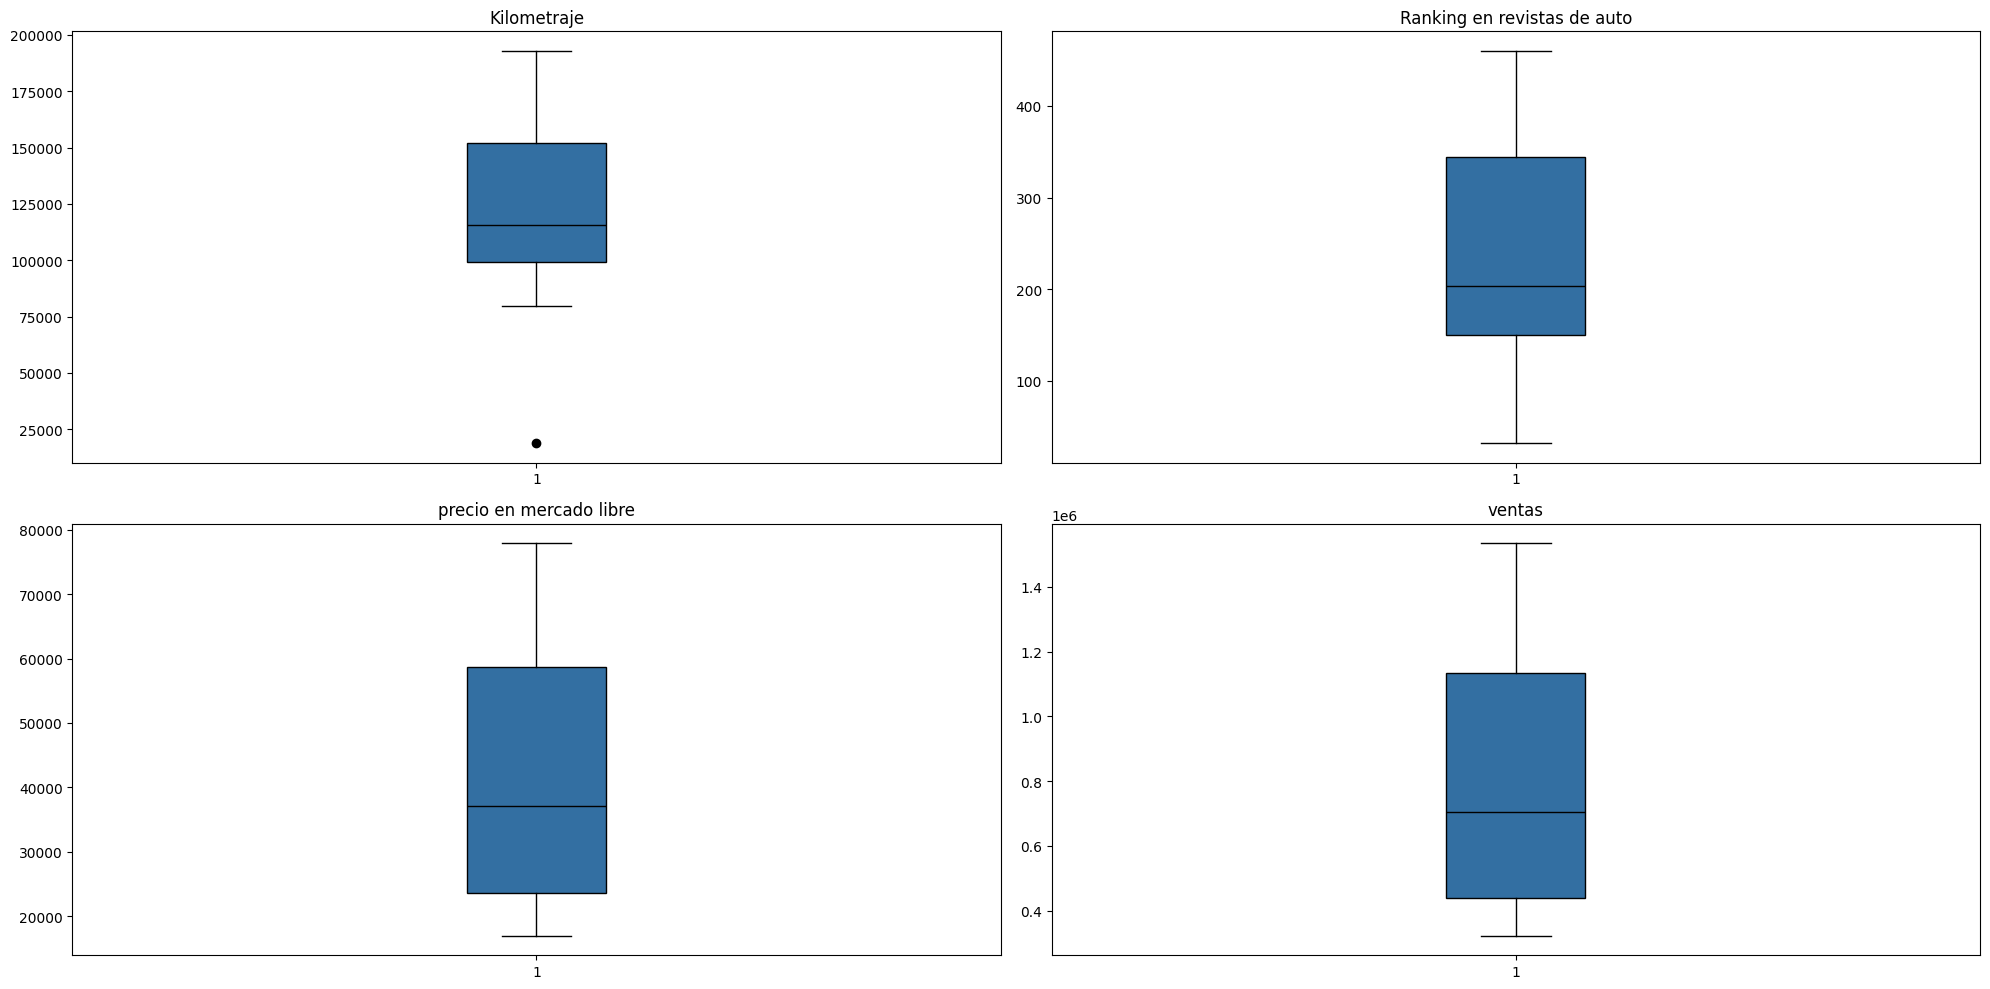

In [268]:
from functions import plot_outliers
plot_outliers(car_sales)

In order to recognize outliers, I used the IQR method, which is a robust method to detect outliers and has been implemented in the functions.py script. I can clearly observe that there is a dot that is far from the rest of the data in the kilometer column, so I will first recognize it and then decide if I eliminate it or not.

In [269]:
from functions import outliers_recogntion

outliers_kilometraje, outlier_values_kilometraje = outliers_recogntion(car_sales, "Kilometraje", 1.5)

Outliers de Kilometraje:
14    18852.031349
Name: Kilometraje, dtype: float64


In [270]:
from functions import remove_outliers

car_sales = remove_outliers(car_sales, "Kilometraje", outliers_kilometraje)

The outlier from the Kilometraje column has been removed due to the fact that it is far from the rest of the average of the data.

In [271]:
car_sales.columns = car_sales.columns.str.replace(' ', '_')

I decided to replace the white spaces of the columns with a _ to make it easier to work with them.

### Creation of Car Age column

I subtract the year of the date of manufacture from the current year to obtain the age of the car.

The date that has been taken is the date in which this project was done. "2023-12-14"

In [272]:
car_sales["hoy"]= "2023-12-14"
car_sales['hoy'] = pd.to_datetime(car_sales['hoy'])
car_sales['fecha_de_elaboracion'] = pd.to_datetime(car_sales['fecha_de_elaboracion'])
car_sales['edad_del_auto'] = (car_sales['hoy'] - car_sales['fecha_de_elaboracion']).dt.days//365

### Distribution of car sales, price and kilometers according to the country of origin

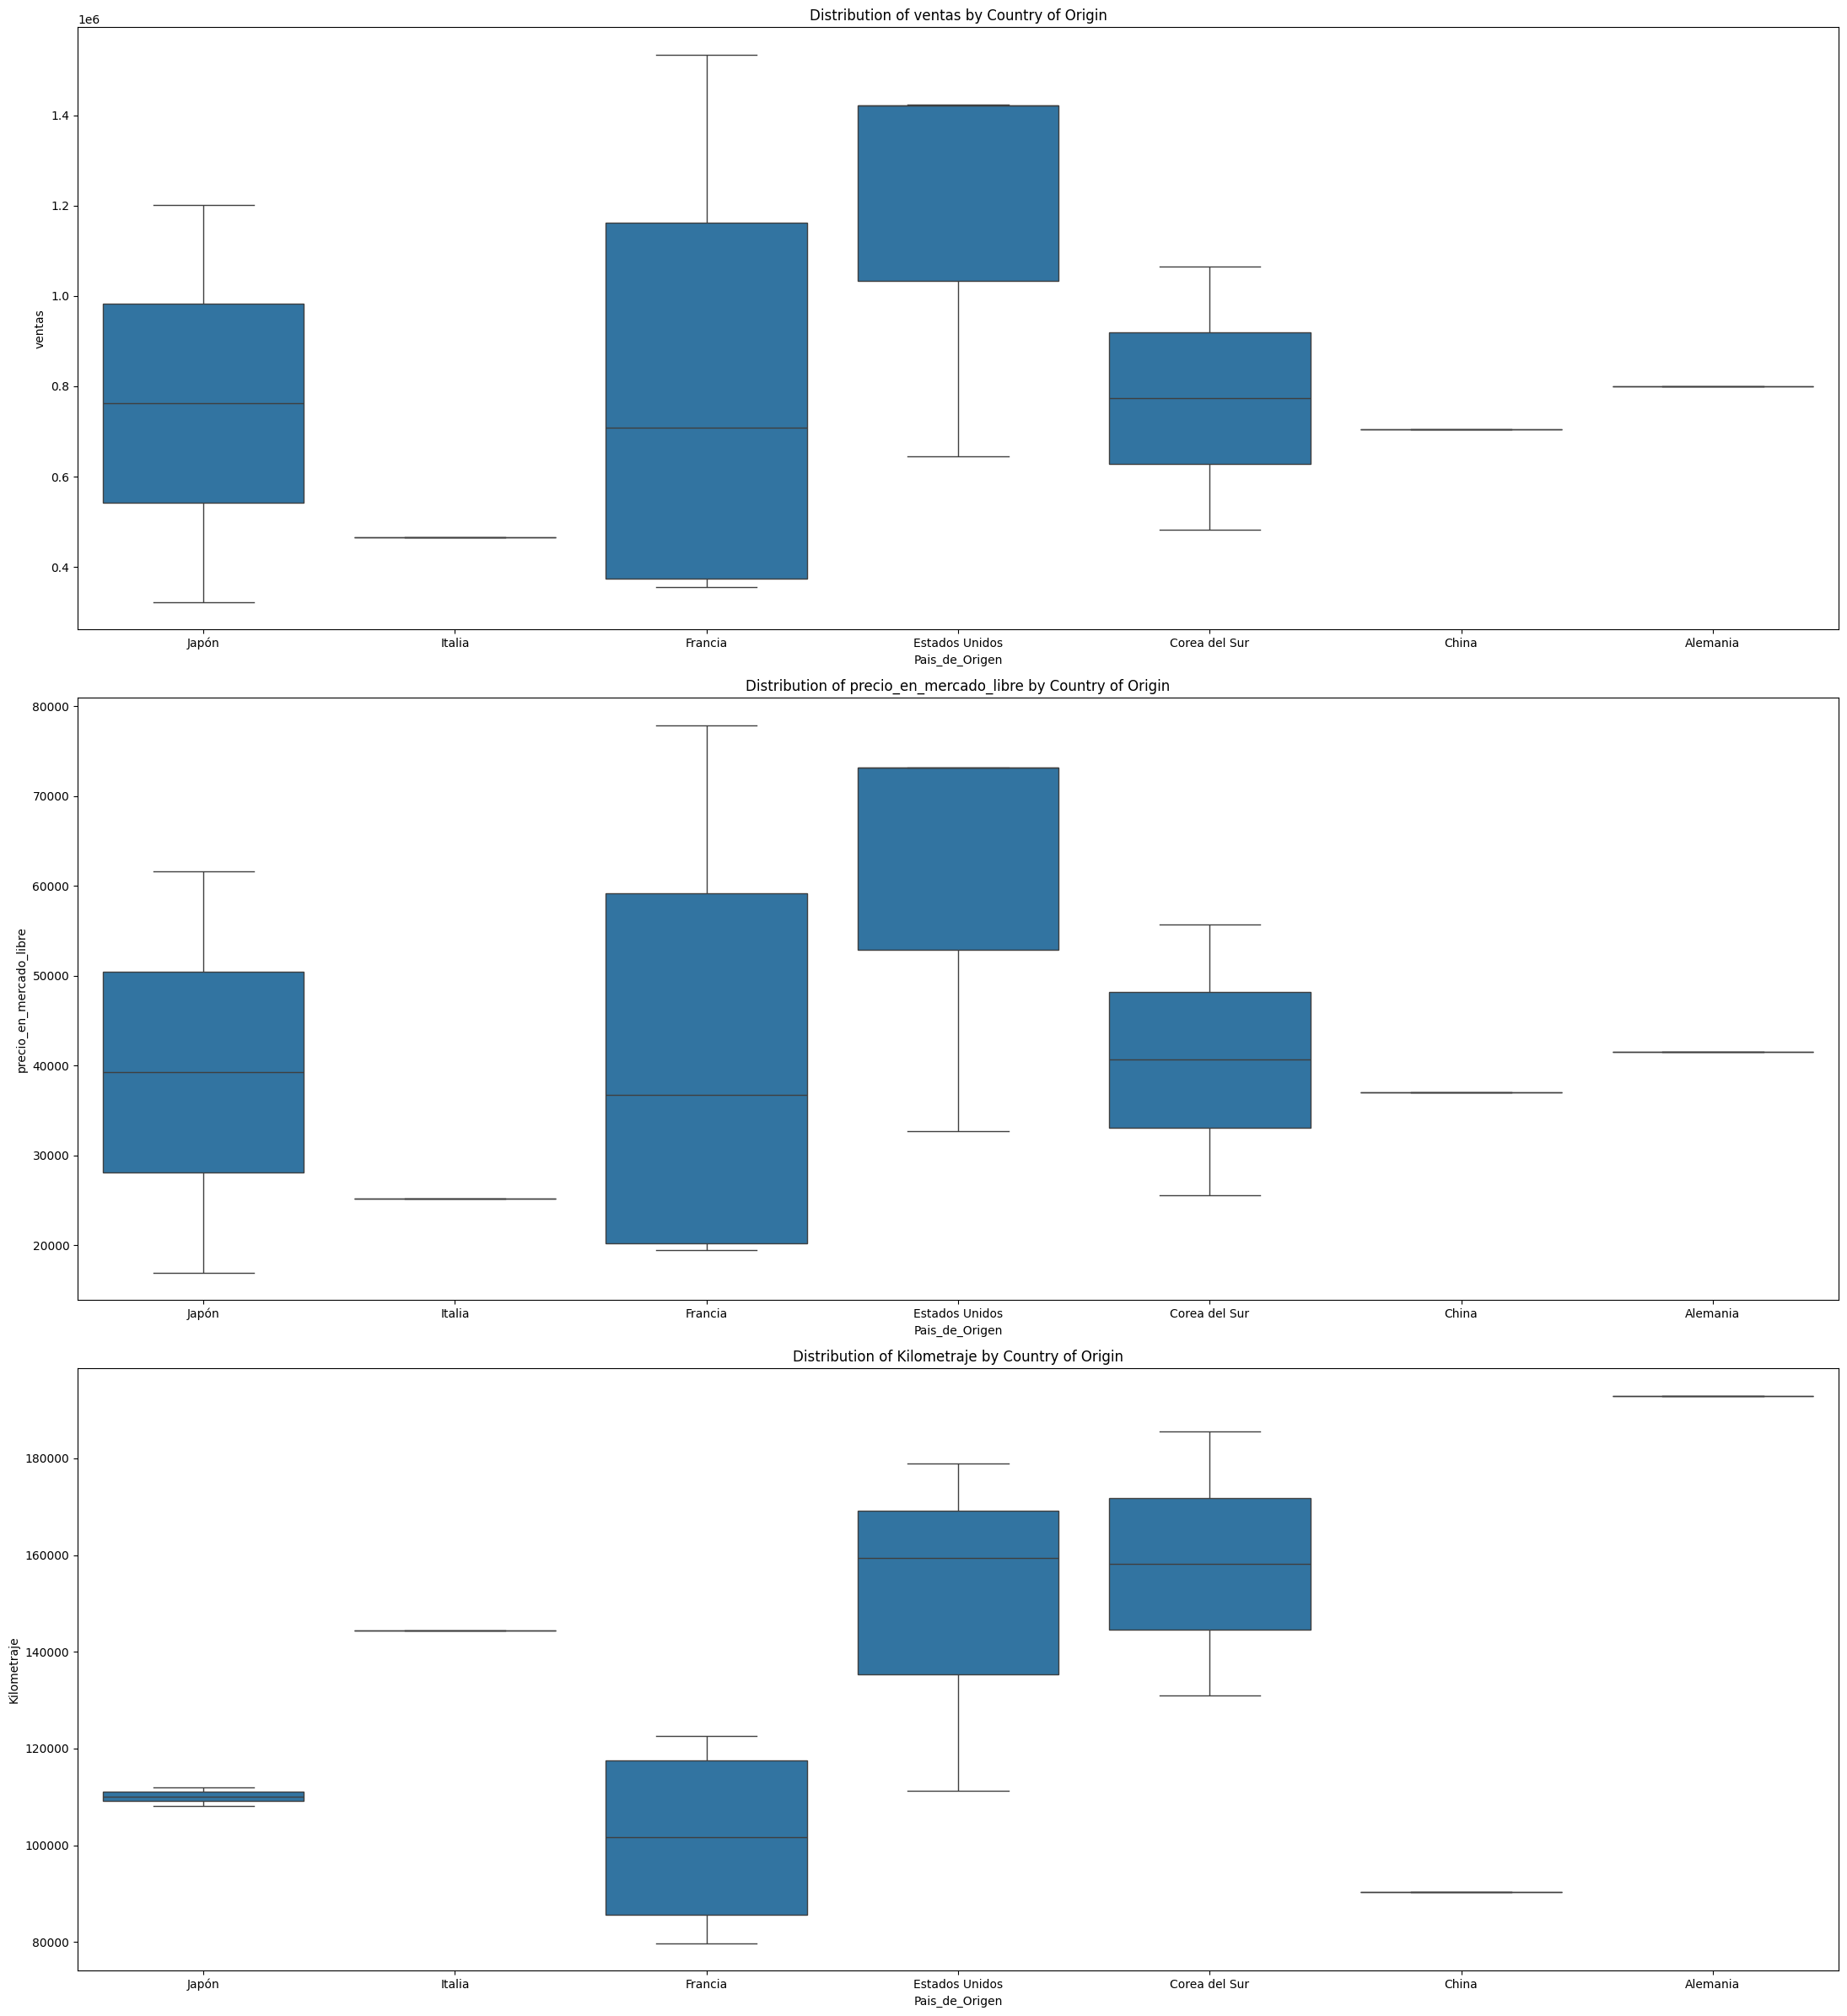

In [273]:
other_variables = ['ventas', "precio_en_mercado_libre", "Kilometraje"]

plt.figure(figsize=(22, 24))
for i, variable in enumerate(other_variables, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='Pais_de_Origen', y=variable, data=car_sales)
    plt.title(f'Distribution of {variable} by Country of Origin')

plt.tight_layout()
plt.show()

## Part 1: Regression.
**dataset**: "ventas_de_autos.csv"

**link**:  https://drive.google.com/file/d/1Uy4I3xus9Rh2MlhEkLNFo10FKuSNKdTQ/view?usp=sharing

*Context: At a job they ask you to predict sales based on the different variables that the data engineers were able to collect. A clear interpretation is expected on the reasons that determine the sales of a car.*


## Correlations

Following the logic of the suggested script, I observe the correlations to focus mainly on the variables that show some degree of association.

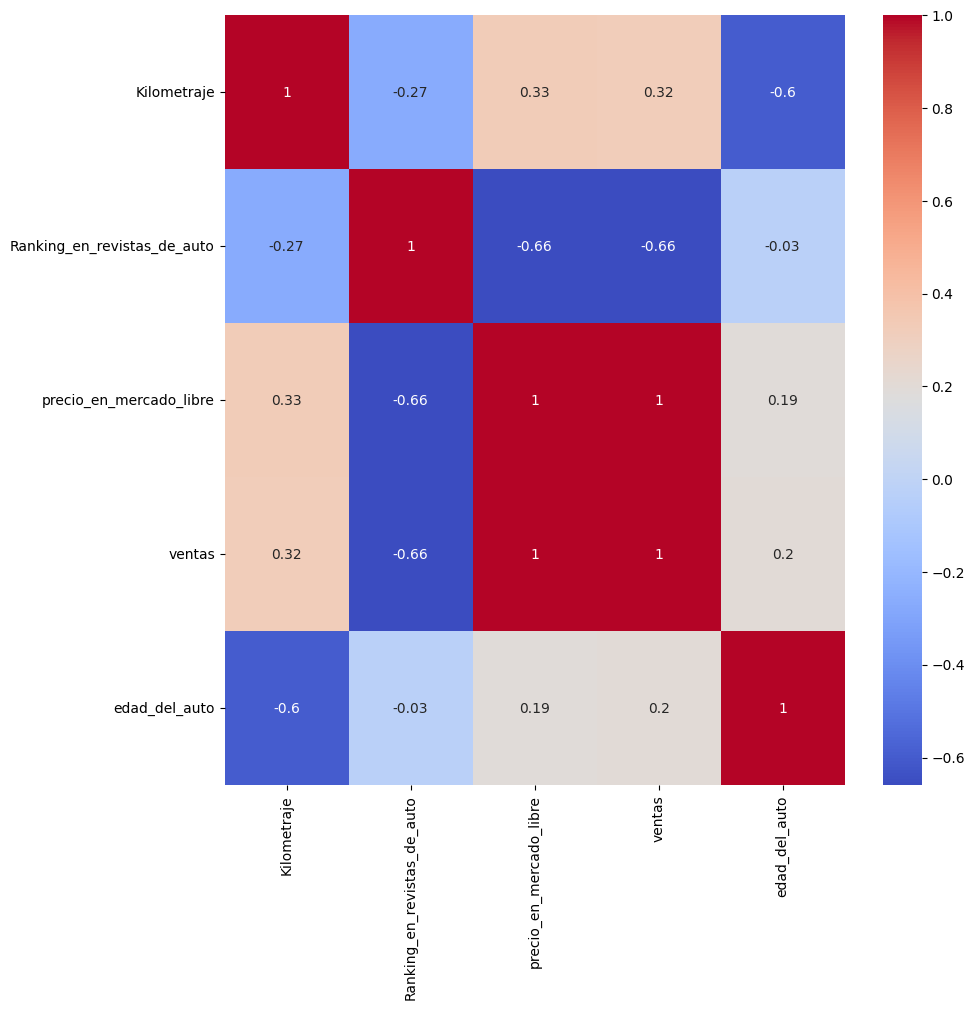

In [275]:
from functions import crear_heatmap_correlacion
crear_heatmap_correlacion(car_sales)

# Models

## Multiple Linear Regression

The idea is to predict a continuous variable and for this I will use a regression and not a classification. The idea is to try to make a base model that points more to understanding the problem than to making a prediction. Therefore, since the regressors are robust, the idea is to run a multiple linear regression and be able to interpret the coefficients.

Several suggestions appeared to us in the data exploration. This is about the correlation between the log of the budget and the log of the revenue.

## Model 1

### Dependent variable: ventas
### Independent variables: kilometraje, precio_en_mercado_libre, ranking_en_revistas_de_auto, edad_del_auto, pais_de_origen

In [277]:
features = ['Kilometraje', 'precio_en_mercado_libre', "Ranking_en_revistas_de_auto", "edad_del_auto", "C(Pais_de_Origen)"]

In [278]:
formula = "ventas ~ " + ' + '.join(features)
formula

'ventas ~ Kilometraje + precio_en_mercado_libre + Ranking_en_revistas_de_auto + edad_del_auto + C(Pais_de_Origen)'

In [279]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula=formula, data=car_sales)
model1 = model1.fit()
print(model1.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     2911.
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           9.44e-06
Time:                        13:49:19   Log-Likelihood:                -136.75
No. Observations:                  14   AIC:                             295.5
Df Residuals:                       3   BIC:                             302.5
Df Model:                          10                                         
Covariance Type:            nonrobust  

A low p-value (generally, below 0.05) indicates that the coefficient is significant, so it should not be removed from the model. If it is greater than 0.05, it can be considered that the coefficient is not significant and can be removed from the model.

Saying these in an another way, we should not consider a variable that has a p-value less than 0.5. It is a fairly high threshold and can result in a greater propensity to commit type I errors (falsely accepting the null hypothesis when it is false).


##### The variables within my multivariate linear regression that have a p-value less than 0.5 are the following:
- Pais de origen: China
- Pais de origen: Corea del Sur
- Pais de origen: Francia
- Kilometraje
- Precios de Mercado Libre

##### Japón's coefficient in the model is (-15320). This means that keeping the rest of the variables constant, the model predicts that sales will fall by 15320 units if the car is from Japan.

##### The coefficient for age_of_the_car in the model results is 680.0104. This means that, keeping all other variables constant, the model predicts that sales will increase by 680.0104 units if the age of the car increases by 1 year.

Prediction of sales for a car that has 116.000 kilometers, the country of origin is the United States, the ranking in auto magazines is 150, the price of free market is 50.000 and the date of manufacture is 2015.

In [280]:
df_entrada = pd.DataFrame({
    'Kilometraje': [116000],
    'Pais_de_Origen': ["Estados Unidos"], 
    'Ranking_en_revistas_de_auto': [150],
    'precio_en_mercado_libre': [50000],
    'edad_del_auto': [2023 - 2015]
})

prediction = model1.predict(df_entrada)

print(f"The prediction of sales for the car is: {prediction[0]}")

The prediction of sales for the car is: 984957.4166312594


___


## Part 2: Classification.
**dataset**: "leads_a_clientes.csv"

**link** https://drive.google.com/file/d/1v0o7z70v06NIaBbmo6kwXdZX6pPf8Bdr/view?usp=sharing

*Context: In the context of our discussion, leads refer to potential customers who are prospects—individuals who have the potential to become customers but have not yet made a decision to convert. Your hypothesis is that, based on customer interactions with the company and their characteristics, certain customers are more likely to convert than others.*


In [281]:
df_client_leads = pd.read_csv("leads_a_clientes.csv")
df_client_leads.head()

,Unnamed: 0,fecha de nacimiento,clicks_en_web,puntaje,cantidad_mensajes,ingreso_estimado,categoria,cliente
0,0,1955-11-30 12:27:39.148023,50.109121,232.101644,135.281047,91.231418,Categoria D,Sí
1,1,1998-11-19 12:27:39.148023,2.109121,868.308119,55.687224,740.421698,Categoria D,No
2,2,1962-11-28 12:27:39.148023,14.109121,158.323178,119.574760,15.947268,Categoria D,Sí
3,3,1967-11-27 12:27:39.148023,2.109121,1074.171569,144.817864,950.486443,Categoria D,Sí
4,4,1982-11-23 12:27:39.148023,2.109121,205.078660,37.891444,63.656943,Categoria D,No


In [282]:
df_client_leads.drop(['Unnamed: 0'], axis=1, inplace=True)

### Read dataset and dimension

In [283]:
print(f"Dataset size: {df_client_leads.shape}")

Dataset size: (3000, 7)


In [284]:
df_client_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fecha de nacimiento  3000 non-null   object 
 1   clicks_en_web        3000 non-null   float64
 2   puntaje              3000 non-null   float64
 3   cantidad_mensajes    3000 non-null   float64
 4   ingreso_estimado     3000 non-null   float64
 5   categoria            3000 non-null   object 
 6   cliente              3000 non-null   object 
dtypes: float64(4), object(3)
memory usage: 164.2+ KB


In order to observe all the columns I transpose the dataframe and inspect what it consists of.


In [285]:
df_client_leads.T

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
fecha de nacimiento,1955-11-30 12:27:39.148023,1998-11-19 12:27:39.148023,1962-11-28 12:27:39.148023,1967-11-27 12:27:39.148023,1982-11-23 12:27:39.148023,2005-11-17 12:27:39.148023,1977-11-24 12:27:39.148023,1967-11-27 12:27:39.148023,1962-11-28 12:27:39.148023,1921-12-08 12:27:39.148023,...,1976-11-24 12:27:39.148023,1965-11-27 12:27:39.148023,1978-11-24 12:27:39.148023,1992-11-20 12:27:39.148023,1986-11-22 12:27:39.148023,1962-11-28 12:27:39.148023,1962-11-28 12:27:39.148023,1980-11-23 12:27:39.148023,1982-11-23 12:27:39.148023,1989-11-21 12:27:39.148023
clicks_en_web,50.109121,2.109121,14.109121,2.109121,2.109121,38.109121,9.890879,2.109121,9.890879,21.890879,...,14.109121,33.890879,2.109121,9.890879,2.109121,14.109121,21.890879,50.109121,26.109121,26.109121
puntaje,232.101644,868.308119,158.323178,1074.171569,205.07866,358.237672,174.511556,859.836761,217.499646,1541.580979,...,379.907536,408.23346,433.269932,424.574887,366.384557,351.827087,494.859133,488.597332,368.592515,358.78316
cantidad_mensajes,135.281047,55.687224,119.57476,144.817864,37.891444,80.454442,50.852526,96.972856,34.693838,108.21197,...,93.188799,73.935598,109.335013,103.222126,45.920282,36.691961,53.525986,44.621153,53.934444,52.865183
ingreso_estimado,91.231418,740.421698,15.947268,950.486443,63.656943,219.94165,32.466022,731.777455,76.33142,1427.434821,...,242.053756,270.95776,296.505181,287.632686,228.254797,213.400237,359.351304,352.961711,230.507817,220.498271
categoria,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,Categoria D,...,Categoria B,Categoria A,Categoria B,Categoria B,Categoria A,Categoria B,Categoria B,Categoria A,Categoria A,Categoria A
cliente,Sí,No,Sí,Sí,No,Sí,No,Sí,No,Sí,...,Sí,Sí,Sí,Sí,No,No,No,No,No,No


I observe that it is a client leads dataset with birthdate, clicks on web, score, amount of messages, etc. I rename my dataset pertinent to the topic.

In [286]:
client_leads = df_client_leads
del(df_client_leads)

### Missing values

In [287]:
print(client_leads.isnull().sum())

fecha de nacimiento    0
clicks_en_web          0
puntaje                0
cantidad_mensajes      0
ingreso_estimado       0
categoria              0
cliente                0
dtype: int64


- There are no missing values on the dataset, so I can continue with the analysis.

In [ ]:
client_leads.columns = client_leads.columns.str.replace(' ', '_')

I decided to replace the white spaces of the columns with a _ to make it easier to work with them.

### Creation of Car Age column



I subtract the year of the date of manufacture from the current year to obtain the age of the car.

The date that has been taken is the date in which this project was done. "2023-12-14"

In [289]:
client_leads["hoy"]= "2023-12-14"
client_leads['hoy'] = pd.to_datetime(client_leads['hoy'])
client_leads['fecha_de_nacimiento'] = pd.to_datetime(client_leads['fecha_de_nacimiento'])
client_leads['edad_del_auto'] = (client_leads['hoy'] - client_leads['fecha_de_nacimiento']).dt.days//365

### Cars age

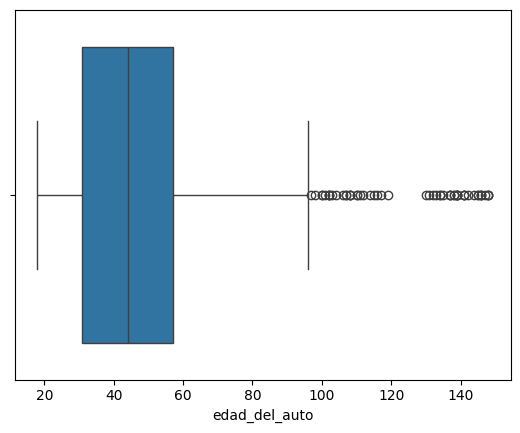

In [290]:
sns.boxplot(x=client_leads['edad_del_auto'])
plt.show()

In [291]:
client_leads["edad_del_auto"].max()

148

It is almost impossible for a car to be more than 90 years old, so it is decided to remove from the dataset the cars that are more than 90 years old in order to be able to make a more accurate analysis.

In [292]:
client_leads = client_leads[client_leads['edad_del_auto'] <= 90]

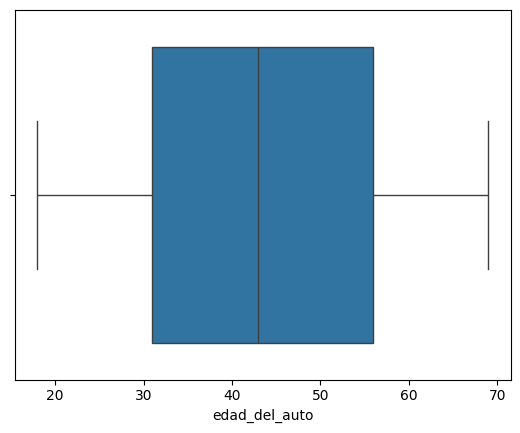

In [293]:
sns.boxplot(x=client_leads['edad_del_auto'])
plt.show()

Now, the boxplot shows us that there are no outliers in the age of the cars.

### Distribution of estimated income according to the category

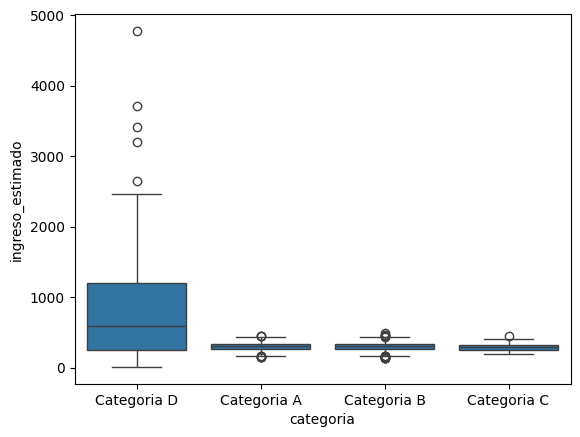

In [294]:
sns.boxplot(x='categoria', y='ingreso_estimado', data=client_leads)
plt.show()

In [295]:
client_leads[client_leads['cliente'] == 'Sí'].groupby('categoria')['cliente'].count()

categoria
Categoria A    674
Categoria B    663
Categoria C     31
Categoria D     71
Name: cliente, dtype: int64

In [296]:
client_leads = client_leads[client_leads['categoria'] != 'Categoria D']

##### We observe conclusions

I have decided to remove Category D since it is the cateogory with the most amount of outliers and it the second category with the least amount of observations.

### Distribution of amount of messages according to if the person is a client or not

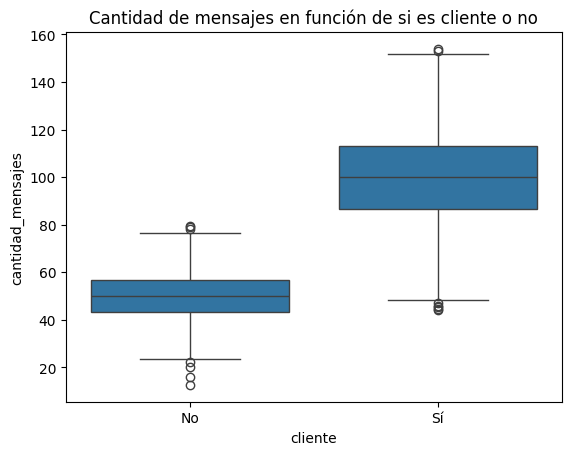

In [297]:
sns.boxplot(x='cliente', y='cantidad_mensajes', data=client_leads)
plt.title('Cantidad de mensajes en función de si es cliente o no')
plt.show()

##### We observe conclusions

This graph of the amount of messages according to whether it is a client or not could help me understand if there is a difference in the amount of messages sent between clients and non-clients.

Clients, in this case, tend to have a higher number of messages. This could suggest that frequent interaction (via messages) may be related to the conversion of a lead to a client.

## Classification

The idea is to predict a categorical variable and for this I will use a classification and not a regression. The idea is to try to make a base model that points more to understanding the problem than to making a prediction.

## Model 2

##### Label Encoding of the category column to be able to train the model.


In [298]:
from sklearn.preprocessing import LabelEncoder
client_leads_le = LabelEncoder()
client_leads_le.fit(client_leads['categoria'])
client_leads_le.classes_

array(['Categoria A', 'Categoria B', 'Categoria C'], dtype=object)

In [299]:
client_leads['categoria'] = client_leads_le.transform(client_leads['categoria'])

I decide to map the Yes and No values to 1 and 0 respectively, since it is a binary classification.

In [300]:
client_leads['cliente'] = client_leads['cliente'].map({'Sí': 1, 'No': 0})

##### Dependent variable: cliente
##### Independent variables: edad_del_auto, ingreso_estimado, cantidad_de_mensajes, puntaje, clicks_en_web, categoria

In [301]:
X = client_leads[["edad_del_auto", 'ingreso_estimado', 'cantidad_mensajes', "puntaje", "clicks_en_web", "categoria"]]
y = client_leads['cliente']

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [303]:
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model = decision_tree_model.fit(X_train, y_train)

In [304]:
y_pred = decision_tree_model.predict(X_test)

In [305]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
tp, fn, fp, tn = conf_matrix.ravel()

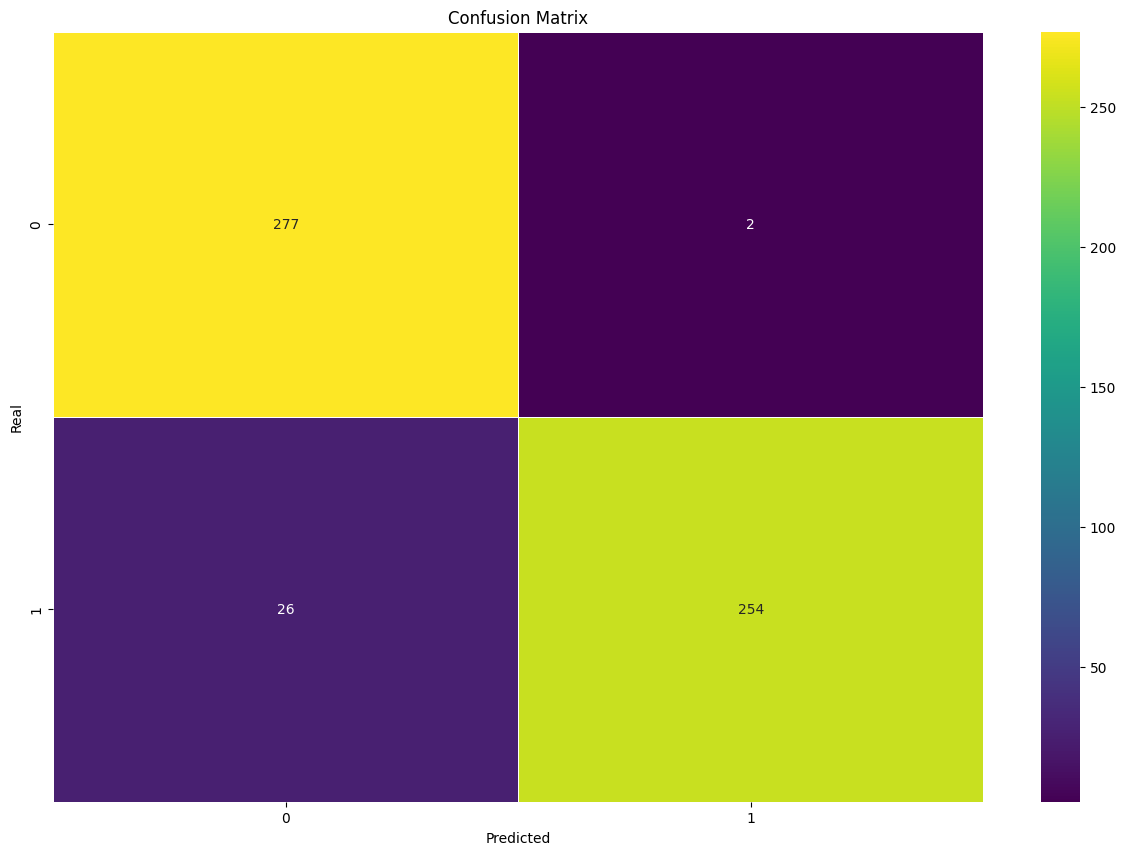

In [306]:
y_true = y_test
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, linewidth=0.5, fmt=".0f", cmap='viridis', ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title('Confusion Matrix')
plt.show()

In [307]:
print("Precision:", precision_score(y_true, y_pred))
print("Recall:", recall_score(y_true, y_pred))
print("Accuracy:", accuracy_score(y_true, y_pred))

Precision: 0.9921875
Recall: 0.9071428571428571
Accuracy: 0.9499105545617174


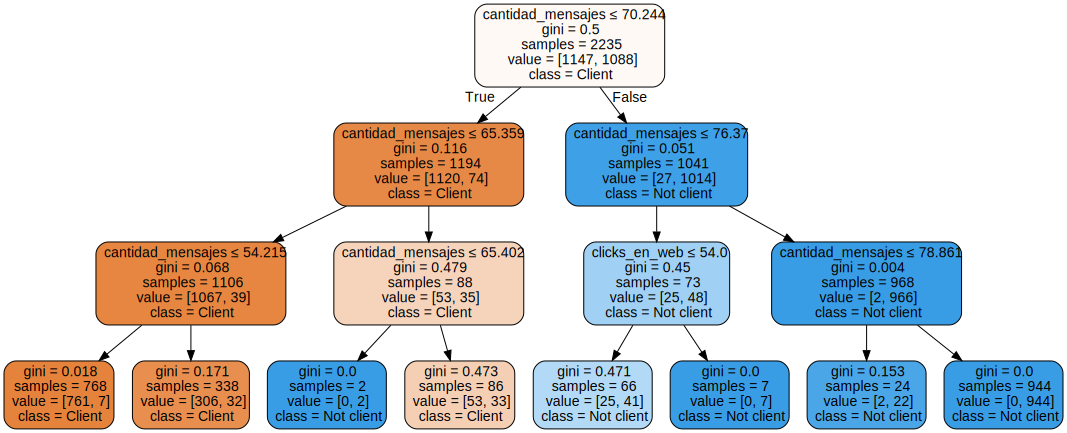

In [308]:
#!pip install scikit-learn graphviz matplotlib
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['Client', 'Not client'],
                           filled=True, rounded=True,  
                           special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render("decision_tree")
graph 

##### We observe conclusions

The decision tree has the followins structure. Root node (without incoming branches, the first division is made according to the most important variable), branches (feed the internal nodes), internal nodes (decision nodes, divide the data set again according to the variables) and leaf / terminal nodes (represent all possible results of the data set, their function is to indicate the definitive classification).

In this case the variable of the root node is the variable cantidad_mensajes. This means that the variable cantidad_mensajes is the most important variable to predict whether a lead will become a client or not. This is because it is the variable that has the highest Gini Index, that is, the variable that has the greatest capacity to separate the data according to the target variable.


___

## Part 3: ROI

Taking into account the results of the confusion matrix of Part 2...

*Context: Your hypotheses were demonstrated given the analysis of the previous points. That is, you showed that those variables were consistent with predicting which client will convert or not. Therefore, given your algorithm, the idea is to generate an action by the company. Advertise to the leads that you predict as customers. For this you must answer:*

In [309]:
print(conf_matrix)

[[277   2]
 [ 26 254]]


In [310]:
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

1. The wasted advertising would be the advertising cost for the leads that the model incorrectly predicted as customers. This would correspond to the False Positives (FP). If each advertisement costs 10, then the wasted advertisement would be `FP * 10`.

In [311]:
wasted_advertising = FP * 10
print("The cost of wasted advertising would be of:", "$", wasted_advertising)

The cost of wasted advertising would be of: $ 20


2. The ROI is calculated as `(Profit - Cost) / Cost` . It would be the profit from the customers that the model correctly predicted as customers (TP), each contributing 150. The cost is the total investment in advertising, which would be 10 * (TP + FP). Then, the ROl would be `((Total Advertising Cost * 150) - 10 * (TP + FP)) / (10 * (TP + FP))`


In [312]:
TP = 254
FP = 2

total_advertising_cost = 10 * (TP + FP)
print(f"The total advertising cost would be of:", "$", total_advertising_cost)

The total advertising cost would be of: $ 2560


In [313]:
profit = TP * 150
total_advertising_cost = 10 * (TP + FP)

In [314]:
ROI = (profit - total_advertising_cost) / total_advertising_cost
print(f"El ROI del modelo sería: {ROI}")

El ROI del modelo sería: 13.8828125
